<hr style="height:5px;border:none" />
<h1 align="center">KeyPoint Detection Competition</h1>
<hr style="height:5px;border:none" />
<ul>
    <li>Name: Yunxiang Liu</li>
    <li>Wechat Account: Claude13786489290</li>
    <li>Github Name: iClaude1998</li>
    <li>Email: 1316761893@qq.com</li>
</ul>


<div>
    <h2>Task 1: Data Loading and Sample Viewing </h2>
    <hr style="border:none;border-top:2px dotted #185598;" />
    <p>Load data, view a sample</p>
</div>




In [45]:
import cv2
import pandas as pd
import numpy as np

from scipy import stats
from matplotlib import pyplot as plt

In [46]:
train_path = '../xfdata/train.npy/train.npy'
test_path = '../xfdata/test.npy/test.npy'
label_path = '../xfdata/train.csv'

labels = pd.read_csv(label_path)
train_imgs = np.load(train_path)
test_imgs = np.load(test_path)

print('The key points coordinates(partial): \n {}'.format(labels.head(5)))
print('The training dataset storage data in format: {}'.format(train_imgs.shape))
print('The test dataset storage data in format: {}'.format(test_imgs.shape))


The key points coordinates(partial): 
    left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.342364          38.523613           28.930840   
1          68.912604          31.409117           29.652226   
2          68.708994          40.371149           27.130820   
3          65.334176          35.471878           29.366461   
4          68.634857          29.999486           31.094571   

   right_eye_center_y  nose_tip_x  nose_tip_y  mouth_center_bottom_lip_x  \
0           35.577773   49.256845   68.275955                  47.783946   
1           33.028075   51.913358   48.408453                  50.698868   
2           40.940680   44.502523   69.988486                  45.926427   
3           37.767684   50.411373   64.934767                  50.028780   
4           29.616429   50.247429   51.450857                  47.948571   

   mouth_center_bottom_lip_y  
0                  85.361582  
1                  79.574038  
2                  86.221009  
3

Let's view a sample image and its corresponding keypoints

In [47]:
def view_sample(img, labels, index):
    plt.imshow(np.uint8(img[:, :, index]), cmap='gray')
    # The pandas, numpy has different view rules
    if isinstance(labels, np.ndarray):
        plt.scatter(labels[[i for i in range(0, labels.size, 2)]], 
                    labels[[i for i in range(1, labels.size, 2)]],
                   c='r')
    else:
        plt.scatter(labels.iloc[index, [i for i in range(0, len(labels.iloc[index]), 2)]],
                   labels.iloc[index, [i for i in range(1, len(labels.iloc[index]), 2)]],
                   c='r')
    plt.show()
        
    
    

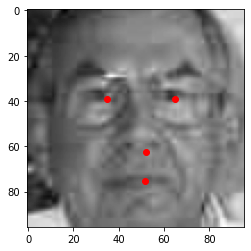

In [48]:
view_sample(train_imgs, labels, 50)

<div>
    <h2>Task 2: Statistic Analysis </h2>
    <hr style="border:none;border-top:2px dotted #185598;" />
    <p>Next, lets view the distribution of 4 keypoints of all train images. First, checking the distribution of 4 points on a figure</p>
</div>

<h3>Task 2.1 Basic Statistic information</h3>

In [65]:
for head in labels.columns:
    info = stats.describe(labels.dropna()[head])
    print('     {}     |  {}  |  {}  |  {}  |  {}  |'.format('Location', 'min', 'max', 'mean', 'variance'))
    print('{}|{:.2f}|{:.2f}|{:.2f}|{:.2f}|'.format(head, info.minmax[0], info.minmax[1], info.mean, info.variance))
    print('------------------------------------------------------------------------')

     Location     |  min  |  max  |  mean  |  variance  |
left_eye_center_x|35.35|94.69|66.34|11.41|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
left_eye_center_y|4.42|80.50|37.58|9.55|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
right_eye_center_x|0.69|85.04|30.31|9.03|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
right_eye_center_y|6.89|81.27|37.96|8.65|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
nose_tip_x|19.22|89.44|48.40|17.86|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
nose_tip_y|26.37|88.83|62.69|31.76|
-----------------------------------------------

<h3>Task 2.2 Key points distributions on all face location</h3>

First, lets view key points together, with an image in training dataset for reference

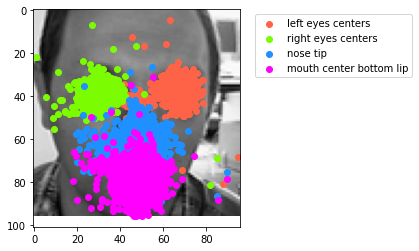

In [97]:
# Display a background image for reference
plt.imshow(np.uint8(train_imgs[:, :, 66]), cmap='gray')
# Let's view all keypoints, notices that, we ignore the samples with any missing value:
Nonull_labels = labels.dropna()
colors = ['tomato', 'lawngreen', 'dodgerblue', 'magenta']
for i in range(Nonull_labels.shape[1] // 2):
    plt.scatter(Nonull_labels.iloc[:, 2*i], Nonull_labels.iloc[:, 2*i+1], c=colors[i])
plt.legend(['left eyes centers', 'right eyes centers', 'nose tip', 'mouth center bottom lip'],
          loc=2, bbox_to_anchor=(1.05,1.0))
plt.show()
    

<p>Then, let's plot the keypoints distribution of different position as heatmap one by one</p>

In [95]:
def view_keypoints(labels, feature_name):
    Nonull_labels = labels.dropna()
    x_range = [Nonull_labels[feature_name+'_x'].mean() - 3*Nonull_labels[feature_name+'_x'].std(),
              Nonull_labels[feature_name+'_x'].mean() + 3*Nonull_labels[feature_name+'_x'].std()]
    y_range = [Nonull_labels[feature_name+'_y'].mean() - 3*Nonull_labels[feature_name+'_y'].std(),
              Nonull_labels[feature_name+'_y'].mean() + 3*Nonull_labels[feature_name+'_y'].std()]
    ranges = np.array([x_range, y_range]).astype('int')
    bins = np.max(ranges[:, 1] - ranges[:, 0])

    H, xedges, yedges = np.histogram2d(Nonull_labels[feature_name+'_x'].values,
                                       Nonull_labels[feature_name+'_y'].values,
                                       bins=bins,
                                       range=ranges,
                                       normed=False)
    X, Y = np.meshgrid(xedges, yedges)
    plt.pcolormesh(X, Y, H, cmap='autumn')
    plt.colorbar()
    plt.title(' '.join(feature_name.split('_')))
    plt.xlabel('x coord')
    plt.ylabel('y coord')
    plt.show()

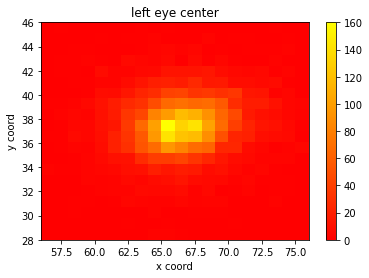

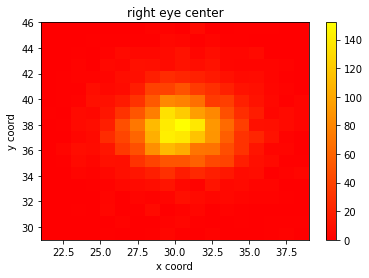

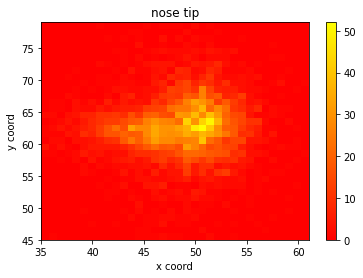

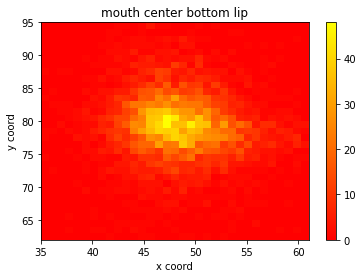

In [96]:
locations = ['left_eye_center', 'right_eye_center', 'nose_tip', 'mouth_center_bottom_lip']
for loc in locations:
    view_keypoints(labels, loc)

It Seems that the left, right eye follows the Gaussian Distribution, so as the mouth center bottom lip, Let's verify it via<strong> KsTest</strong>

In [177]:
def Ks_test(labels, verify_feature, verify_distribustion='norm'):
    test_labels = labels[verify_feature].dropna()
    mean = test_labels.mean()
    std = test_labels.std()
    test_labels = test_labels[(test_labels >= (mean - 3*std)) & (test_labels <= (mean + 3*std))]
    D, p = stats.kstest(test_labels, verify_distribustion, (test_labels.mean(), test_labels.std()))
    if p >= 0.05:
        print('{} follows the {} distribution'.format(verify_feature, verify_distribustion))
    else:
        print('Unfortunately, {} do NOT follows the {} distribution'.format(verify_feature, verify_distribustion))
        test_labels.plot.kde(bw_method=0.3)
        pdf = getattr(stats, verify_distribustion)
        samples = pdf.rvs(loc=test_labels.mean(), scale=test_labels.std(), size=len(test_labels))
        pd.Series(samples).plot.kde(bw_method=0.3, c='r')
        plt.legend(['kde of {}'.format(verify_feature), 'kde of True distribution'], loc=2, bbox_to_anchor=(1.05,1.0))
        plt.show()
    
    
    
    

Unfortunately, left_eye_center_x do NOT follows the norm distribution


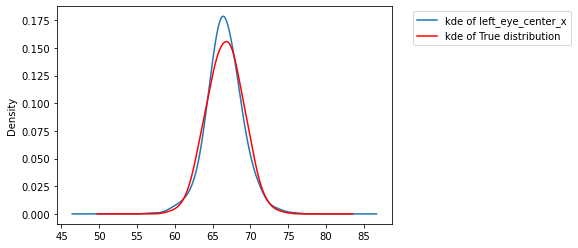

Unfortunately, left_eye_center_y do NOT follows the norm distribution


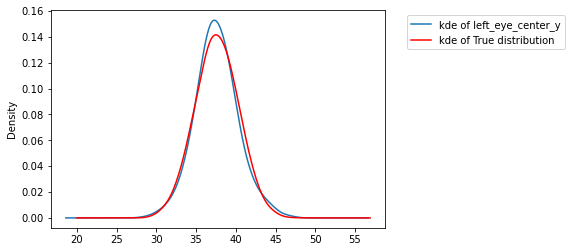

Unfortunately, right_eye_center_x do NOT follows the norm distribution


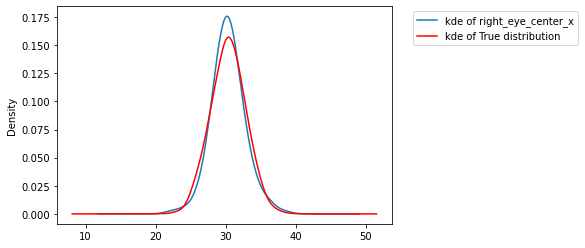

Unfortunately, right_eye_center_y do NOT follows the norm distribution


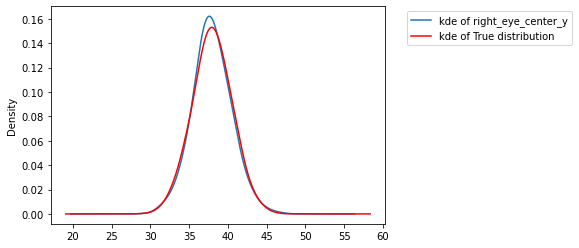

Unfortunately, nose_tip_x do NOT follows the norm distribution


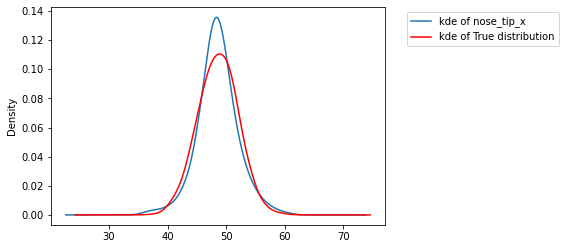

Unfortunately, nose_tip_y do NOT follows the norm distribution


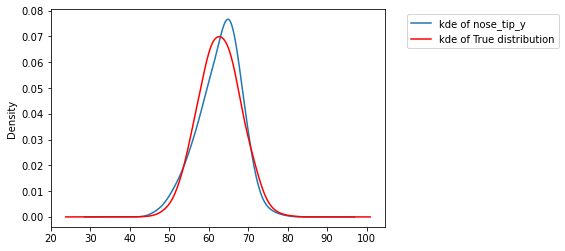

Unfortunately, mouth_center_bottom_lip_x do NOT follows the norm distribution


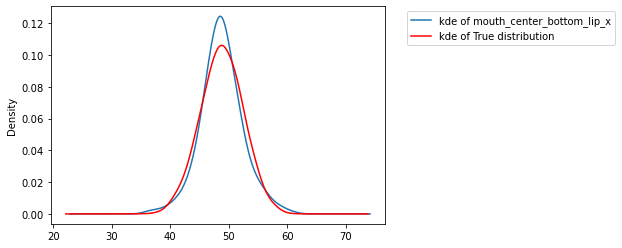

Unfortunately, mouth_center_bottom_lip_y do NOT follows the norm distribution


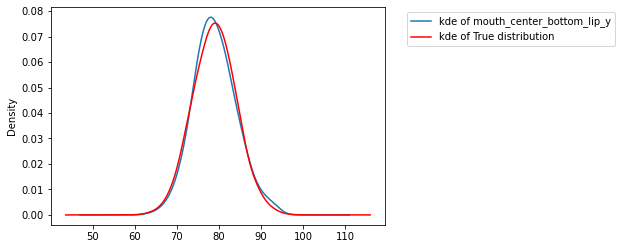

In [178]:
full_locs = ['left_eye_center_x', 'left_eye_center_y', 
             'right_eye_center_x', 'right_eye_center_y',
             'nose_tip_x', 'nose_tip_y', 
             'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y']
for loc in full_locs:
    Ks_test(labels, loc)